# Creación de Tabla Cliente y Tabla Intermedia Territorio_Cliente

Para la creación de algunas columnas de las columnas de la tabla **Cliente** se utilizará primero la pagina web https://mockaroo.com/.

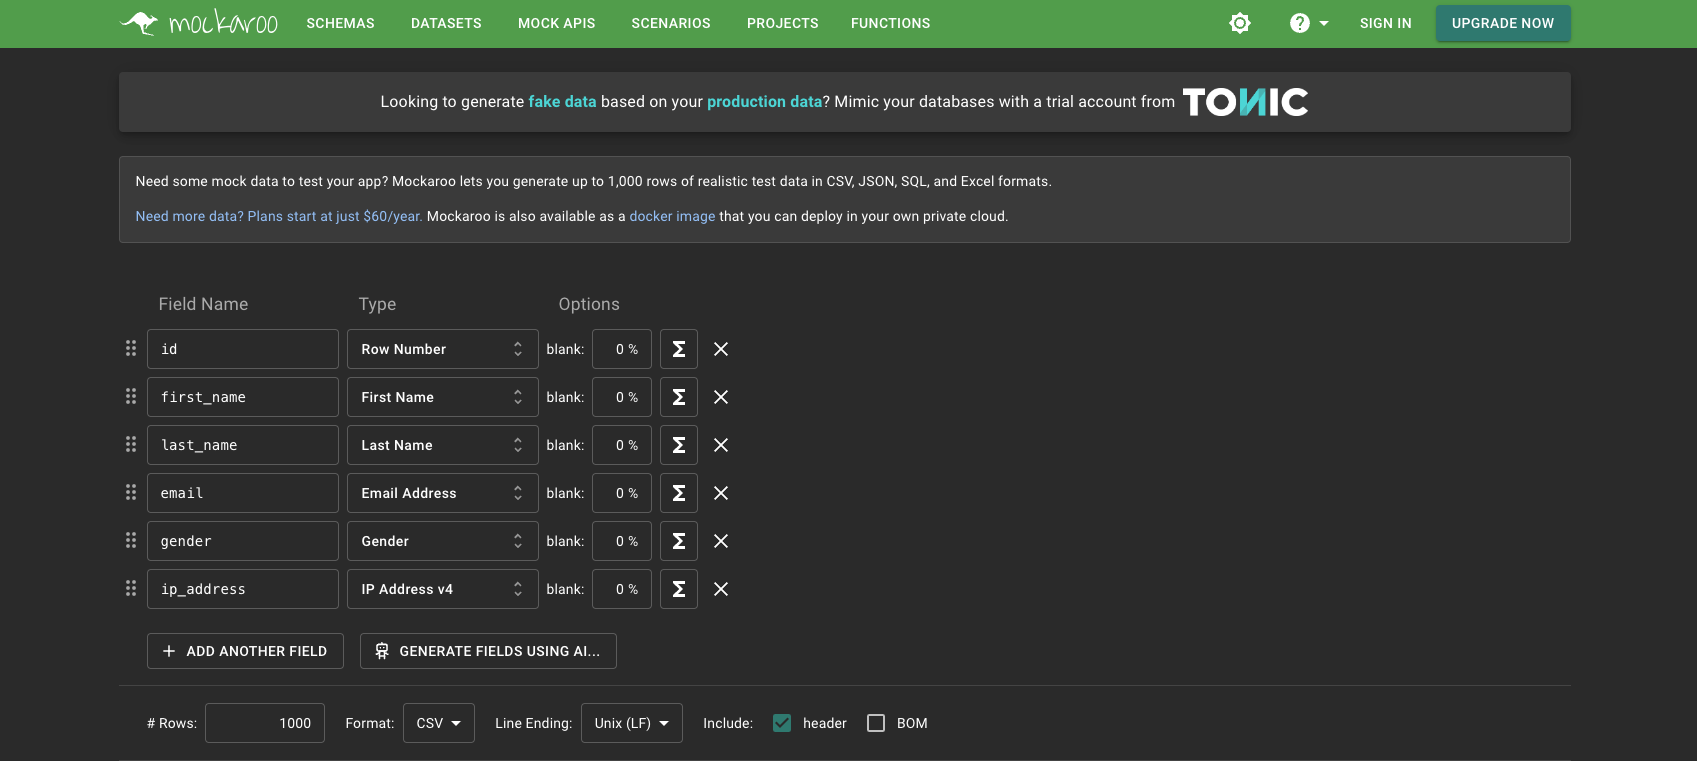

Para la creación de la tabla Cliente de MySQL se tendran los siguientes atributos especificados en el modelo de E-R:

<div>
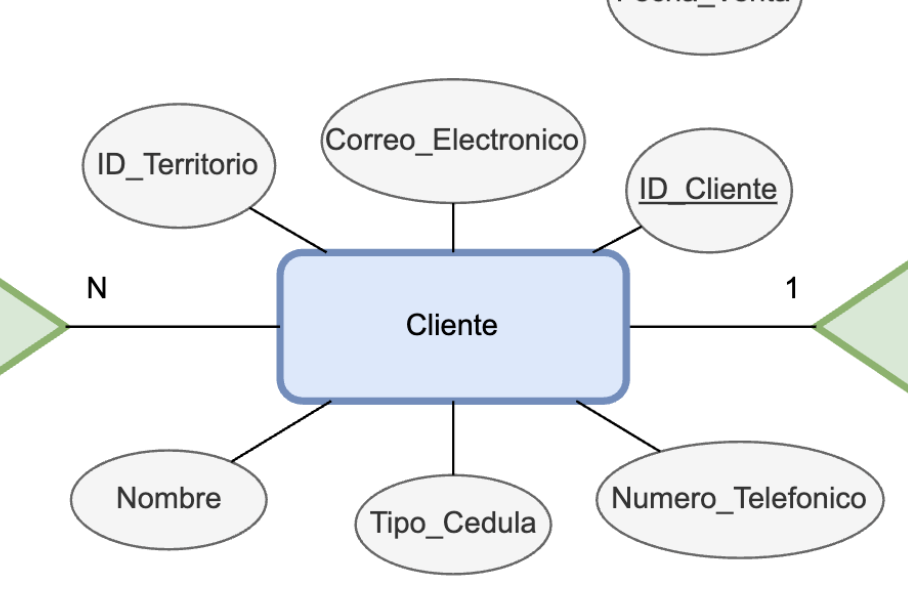
</div>

Por otro lado, para la creación de la tabla **Territorio_Cliente** se utitilizará la base de datos creada en el ipynb de Territorio, llamada Territorio.csv en la cual se utilizará la columna 'Codigo Postal', para asignarle aleatoriamente este codigo a cada cliente, además como es una relación de muchos a muchos entonces un cliente puede tener dos territorios, por lo cual para la asignación de una localización más en esta tabla se eligirán algún cliente al azar y se le asigna un territorio aleatorio. Además para esta tabla intermedia se utilizará el ID de los clientes, es decir las cédulas. De esta manera se crea la tabla intermedia de **Territorio_Cliente**.

## Importamos las librerias 

Para este ipynb utilizaremos las siguientes librerias:
* **pandas**: para poder importar las bases de datos de .csv de territorio y las bases de .csv de mockaroo. Además utilizar los dataframes para poder guardar los datos que posteriormente vamos a manipularlos para poder crear la tabla Cliente y la intermedia para tener los atributos que ocupan.
* **os**: para poder saber el working directory en el cual estamos trabajando.
* **random**: para poder ir variando al azar la ubicación de donde provienen las personas o empresas y poder crear correos al azar con domains validos al azar.

In [1]:
import pandas as pd
import os
import random

## Importación, Manipulación y Resultados del Dataset (Tabla Cliente)

### Importamos el dataset de Mockaroo (Física)

Para la primera importación de datos se creará las personas con cédula física, es decir que van a tener un ID de 9-digitos. Además van a tener un primer nombre y un segundo nombre, puesto que si tienen cédula física no es una empresa si no una persona. Por último, se creara en https://mockaroo.com/ una columan con télefonos. Esta base se llamara Clientes_fisica.csv puesto que son los datos que van a ir en la tabla pero con cédula física.


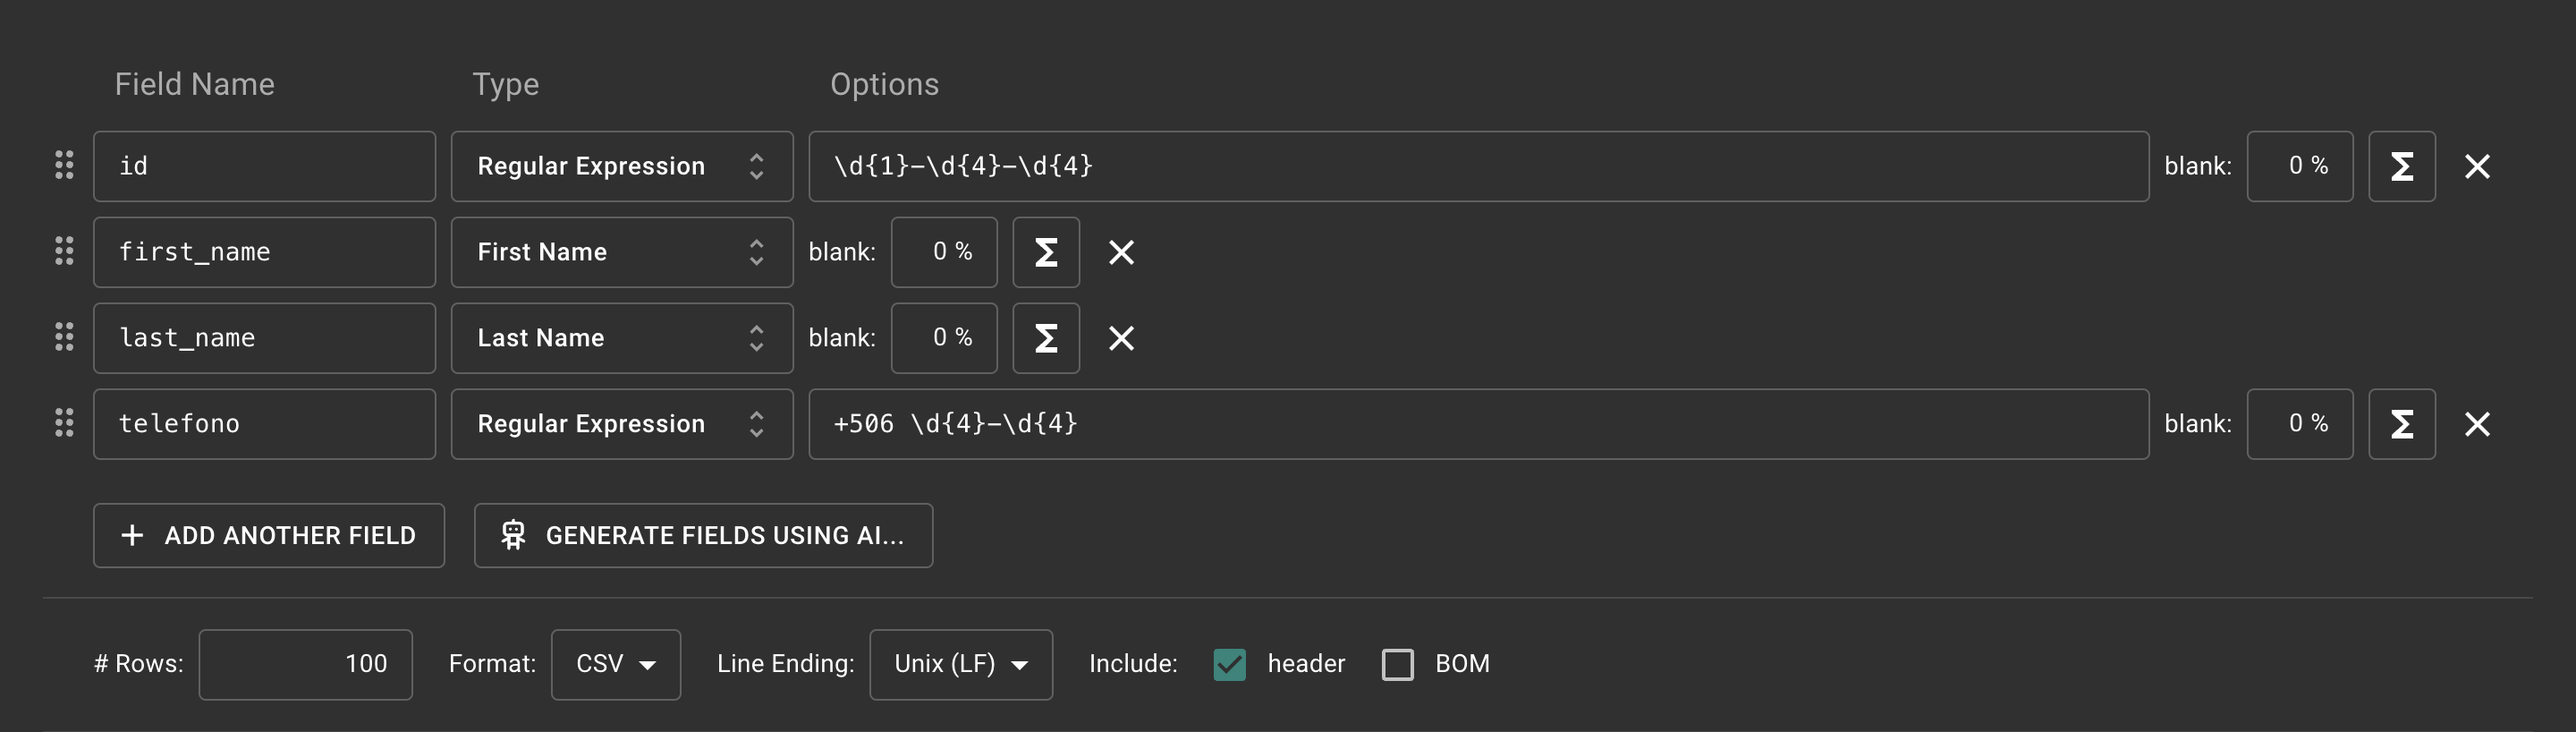

In [2]:
data = pd.read_csv("Clientes_fisica.csv")

In [3]:
data.head()

,id,first_name,last_name,telefono
0,7-7171-3010,Sampson,Pinch,+506 8261-1785
1,2-5447-8089,Ellis,Lassetter,+506 9318-6041
2,0-0052-0484,Gabbey,Estable,+506 2829-0794
3,1-7871-4046,Geneva,Huyge,+506 0493-5950
4,4-2436-9404,Kenon,Redington,+506 3868-9037


### Manipulación de la Base de Datos Clientes_fisica.csv

Ahora que importamos la base de datos de clientes ficticios con un tipo de cédula física (9-dígitos). Como se puede observar en el modelo E-R, el atributo que contiene el primer nombre y segundo nombre solo viene en una columna, por lo cual, vamos a convertir y concatenar amabas columnas a una sola, llamada **nombre**.

In [4]:
data['nombre'] = data[['first_name','last_name']].apply(lambda x: ' '.join(x), axis=1)

Ahora que concatenamos la información de first_name con last_name. Posterior a realizar eso se creará el atributo llamado correo_electronico. Primero para generar esta creamos una lista de correos la cual se utilizara para generar los domains de los correos. Segundo haremos haremos una sintaxis simiar a la anterior para poder concatenar la columna **first_name** con **last_name**, la diferencia es que esta vez lo uniremos con una barra baja ('_) y después le agregamos el domain para cada persona sin embargo aquí hacemos uso de la libreria random para asignar al azar los domains que contiene la lista de correos.

In [5]:
correos = ['@gmail.com','@hotmail.com','@outlook.com','@yahoo.com']
data['email'] = data[['first_name','last_name']].apply(lambda x: '_'.join(x)+f'{random.choice(correos)}', axis=1)

Ahora que tenemos las dos columnas que nos interesan, que se utiliza las columnas **first_name** y **last_name**, ya se pueden eliminar estas columnas recien mencionadas. Además que no aparecen en el modelo E-R, de la tabla **Cliente**.

In [6]:
data.drop(columns=['first_name','last_name'],inplace = True)

Ahora como importamos el dataset en el cual todos los clientes contienen una cédula física, crearemos una columna llamada **'tipo de cedula'**, la cual indica cual tipo de identificación contienen los clientes. Como mencione todos los datos importados anteriormente provienen de cédula fisica por lo cual todos los casos hay que insertarle "Física".

In [7]:
data["tipo de cedula"] = "Fisica"

Verificamos que la data haya quedado con todos los atributos correctos, que contiene la tabla Clientes del modelo E-R.

In [8]:
data.head()

,id,telefono,nombre,email,tipo de cedula
0,7-7171-3010,+506 8261-1785,Sampson Pinch,Sampson_Pinch@outlook.com,Fisica
1,2-5447-8089,+506 9318-6041,Ellis Lassetter,Ellis_Lassetter@yahoo.com,Fisica
2,0-0052-0484,+506 2829-0794,Gabbey Estable,Gabbey_Estable@outlook.com,Fisica
3,1-7871-4046,+506 0493-5950,Geneva Huyge,Geneva_Huyge@outlook.com,Fisica
4,4-2436-9404,+506 3868-9037,Kenon Redington,Kenon_Redington@yahoo.com,Fisica


### Importamos el dataset de Mockaroo (Jurídica)

Para la segunda importación de datos se creará las empresas con cédula jurídica, es decir que van a tener un ID de 10-digitos. Además van a tener una columna denomidada nombre, en donde van los nombres de las empresas. Por último, se creara en https://mockaroo.com/ una columan con télefonos. Esta base se llamara Clientes_juridica.csv puesto que son los datos que van a ir en la tabla pero con cédula jurídica.

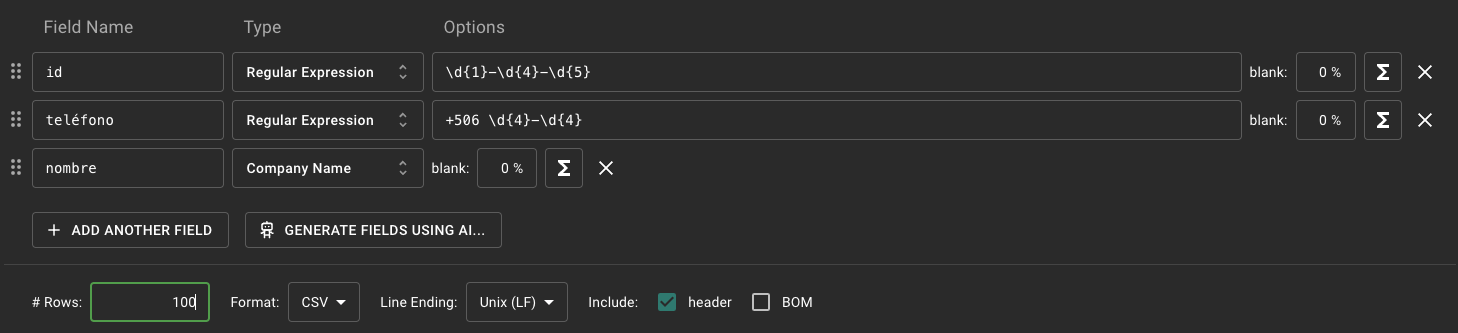

In [9]:
data_empresas = pd.read_csv("Clientes_juridica.csv")

In [10]:
data_empresas.head()

,id,telefono,nombre
0,6-8372-47180,+506 0007-6542,Photobean
1,6-1324-78771,+506 9658-2976,Kwimbee
2,3-2201-60864,+506 7693-9723,Geba
3,7-2176-92978,+506 2311-1357,Zoomlounge
4,8-4596-89425,+506 4424-7990,Blognation


### Manipulación de la Base de Datos Clientes_fisica.csv

Ahora que importamos la base de datos de clientes ficticios con un tipo de cédula jurídica (10-dígitos). Primero haremos una sintaxis simiar a la anterior que se hizo en la creación de emails para la base de Clientes_fisica, sin embargo aquí como no hay primer y segundo nombre, entonces se agarrará el nombre de la empresa y se le agrega al azar un domain de correo al azar.

In [11]:
data_empresas['email'] = data_empresas[['nombre']].apply(lambda x: x +f'{random.choice(correos)}', axis=1)

Ahora como importamos el dataset en el cual todos los clientes contienen una cédula jurídica, crearemos una columna llamada **'tipo de cedula'**, la cual indica cual tipo de identificación contienen los clientes. Como mencione todos los datos importados anteriormente provienen de cédula jurídica por lo cual todos los casos hay que insertarle "Juridica".

In [12]:
data_empresas["tipo de cedula"] = "Juridica"

Verificamos que la data haya quedado con todos los atributos correctos, que contiene la tabla Clientes del modelo E-R.

In [13]:
data_empresas.head()

,id,telefono,nombre,email,tipo de cedula
0,6-8372-47180,+506 0007-6542,Photobean,Photobean@hotmail.com,Juridica
1,6-1324-78771,+506 9658-2976,Kwimbee,Kwimbee@hotmail.com,Juridica
2,3-2201-60864,+506 7693-9723,Geba,Geba@yahoo.com,Juridica
3,7-2176-92978,+506 2311-1357,Zoomlounge,Zoomlounge@hotmail.com,Juridica
4,8-4596-89425,+506 4424-7990,Blognation,Blognation@gmail.com,Juridica


### Concatenación de Ambas Bases

Ahora, se concatenaran ambas bases, la de **Clientes_fisica** y la de **Clientes_juridica**. Esto se hará con la función de pandas, llamada *pd.concat()*.

In [14]:
data_final = pd.concat([data,data_empresas])

Verificamos que en la parte de arriba del DataFrame vaya los clientes con cédula física y en la parte de abajo del DataFrame vaya los clientes con cédula física.

In [15]:
data_final.head()

,id,telefono,nombre,email,tipo de cedula
0,7-7171-3010,+506 8261-1785,Sampson Pinch,Sampson_Pinch@outlook.com,Fisica
1,2-5447-8089,+506 9318-6041,Ellis Lassetter,Ellis_Lassetter@yahoo.com,Fisica
2,0-0052-0484,+506 2829-0794,Gabbey Estable,Gabbey_Estable@outlook.com,Fisica
3,1-7871-4046,+506 0493-5950,Geneva Huyge,Geneva_Huyge@outlook.com,Fisica
4,4-2436-9404,+506 3868-9037,Kenon Redington,Kenon_Redington@yahoo.com,Fisica


In [16]:
data_final.tail()

,id,telefono,nombre,email,tipo de cedula
95,6-4574-61686,+506 8309-7650,Izio,Izio@gmail.com,Juridica
96,7-2498-77422,+506 0779-1250,Edgepulse,Edgepulse@outlook.com,Juridica
97,7-0923-94891,+506 1518-9237,Oozz,Oozz@hotmail.com,Juridica
98,8-3043-30579,+506 1195-4317,Gigabox,Gigabox@hotmail.com,Juridica
99,4-5962-33678,+506 5004-5403,Katz,Katz@yahoo.com,Juridica


Como se puede ver en la verificación anterior de la base concatenada, todo esta en orden, por lo cual vamos a guardar la base en un documento .csv.

In [17]:
data_final.to_csv("clientes.csv")

Por último, para poder insertar los datos en MySQL con su formato adecuado que permite dicho sistema, utilizaremos un for loop en cual iteraremos dentro del DataFrame que vaya por cada fila y agarrar el valor adecuado de cada cliente. 

El codigo para insertar en MySQL para esta tabla fue el siguiente por lo cual se ordeno cada valor que saliera de tal manera en el for-loop con su print. Este fue:

**INSERT INTO** Cliente (id_cliente, tipo_cedula, nombre, correo_electronico, numero_telefono)

**VALUES**

In [18]:
for i in range(data_final.shape[0]):
    print(f"('{data_final.iloc[i][0]}','{data_final.iloc[i][-1]}','{data_final.iloc[i][2]}','{data_final.iloc[i][3]}','{data_final.iloc[i][1]}'),")

('7-7171-3010','Fisica','Sampson Pinch','Sampson_Pinch@outlook.com','+506 8261-1785'),
('2-5447-8089','Fisica','Ellis Lassetter','Ellis_Lassetter@yahoo.com','+506 9318-6041'),
('0-0052-0484','Fisica','Gabbey Estable','Gabbey_Estable@outlook.com','+506 2829-0794'),
('1-7871-4046','Fisica','Geneva Huyge','Geneva_Huyge@outlook.com','+506 0493-5950'),
('4-2436-9404','Fisica','Kenon Redington','Kenon_Redington@yahoo.com','+506 3868-9037'),
('3-2402-0796','Fisica','Zebulon Le Merchant','Zebulon_Le Merchant@gmail.com','+506 8312-5720'),
('7-0608-3892','Fisica','Gibby Elks','Gibby_Elks@outlook.com','+506 2363-4583'),
('1-8891-7972','Fisica','Zelma Fewkes','Zelma_Fewkes@hotmail.com','+506 9096-8954'),
('2-5340-7263','Fisica','Teirtza Schenfisch','Teirtza_Schenfisch@hotmail.com','+506 9736-5380'),
('2-1643-6517','Fisica','Hoyt Recke','Hoyt_Recke@yahoo.com','+506 9776-4461'),
('5-9152-4645','Fisica','Modestine Buye','Modestine_Buye@outlook.com','+506 5623-1578'),
('6-7715-2373','Fisica','Finley F

## Importación, Manipulación y Resultados del Dataset (Tabla Intermedia)

Para la creación de esta tabla intermedia de relación entre la tabla Territorio y Cliente, de muchos a muchos, se utilizaran las dos llaves primarias de cada tabla mencionada anteriormente. Más detalle acerca esta tabla se puede ver en el principio de este ipynb.

### Importamos el dataset de Territorio

Primero importaremos el dataset de Territorio creado en el ipynb llamado "Web-Scrapping Territorio", en donde tenemos los códigos postal de cada territorio de Costa Rica.

In [19]:
codigos_cr = pd.read_csv('territorios.csv')
codigos_cr.head()

,Unnamed: 0,Provincia,Cantón,Distrito,Código Postal
0,0,San José,San José,Carmen,10101
1,1,San José,Escazú,Escazú,10201
2,2,San José,Desamparados,Desamparados,10301
3,3,San José,Puriscal,Santiago,10401
4,4,San José,Tarrazú,San Marcos,10501


### Manipulación de la base Territorio y Clientes

Ya importados los datos de ambas tablas, podemos proseguir a crear un DataFrame en el cual contenga que cada cliente tenga un código postal aleatoriamente. Esto lo haremos con la libreria de **random** 

In [20]:
codigos_cr = codigos_cr["Código Postal"].to_list()#Agarramos solo los códigos postales y los convertimos en una lista
cedulas = data_final["id"].to_list() #Agarramos solo los id de los clientes y los convertimos en una lista

In [21]:
data_inter = pd.DataFrame(data_final["id"]) #Creamos un DataFrame con los ID de los clientes
data_inter["cod"] = random.choices(codigos_cr, k = 200) #Asignamos un territorio al azar para cada cliente

Ahora que ya tenemos que cada cliente tiene su propio código postal, ahora tenemos que crear que por lo menos un cliente tenga más de un código postal. Crearemos que 25 clientes tengan por lo menos más de un territorio.

In [22]:
data_inter = data_inter.reset_index(drop=True)
data_inter.tail() #Verificamos los datos de abajo del DataFrame previo a la inserción de los nuevos datos

,id,cod
195,6-4574-61686,70601
196,7-2498-77422,20601
197,7-0923-94891,40901
198,8-3043-30579,21201
199,4-5962-33678,70101


In [23]:
for i in range(data_inter.shape[0], 225):
    data_inter.loc[i] = [random.choice(cedulas),random.choice(codigos_cr)]
#Aleatorizamos cual cliente tiene más de un territorio y además les asignamos un territorio al azar

In [24]:
data_inter.tail() #Verificamos que si se ingresaron los nuevos datos

,id,cod
220,6-1324-78771,50101
221,7-5374-30956,40601
222,3-3427-76194,21401
223,9-6543-64741,40301
224,2-3625-1419,11601


In [25]:
data_inter.to_csv('Intermedia_Territorio_Cliente.csv')

Por último, para poder insertar los datos en MySQL con su formato adecuado que permite dicho sistema, utilizaremos un for loop en cual iteraremos dentro del DataFrame que vaya por cada fila y agarrar el valor adecuado. 

El codigo para insertar en MySQL para esta tabla fue el siguiente por lo cual se ordeno cada valor que saliera de tal manera en el for-loop con su print. Este fue:

**INSERT INTO** Cliente_Territorio (id_cliente, id_territorio)

**VALUES**

In [26]:
for i in range(data_inter.shape[0]):
    print(f"('{data_inter.iloc[i][0]}','{data_inter.iloc[i][1]}'),")

('7-7171-3010','60301'),
('2-5447-8089','50201'),
('0-0052-0484','61001'),
('1-7871-4046','60301'),
('4-2436-9404','70601'),
('3-2402-0796','30101'),
('7-0608-3892','20301'),
('1-8891-7972','70301'),
('2-5340-7263','60401'),
('2-1643-6517','40601'),
('5-9152-4645','11901'),
('6-7715-2373','20301'),
('8-1062-8941','11701'),
('5-6153-6824','70201'),
('0-2369-7932','10501'),
('6-0758-0096','40901'),
('5-6923-9991','30701'),
('2-5698-9971','11501'),
('2-4627-3031','40301'),
('2-9504-8843','10101'),
('1-3238-3743','40701'),
('8-1922-0258','11201'),
('3-8276-8243','21101'),
('5-5085-2194','70101'),
('4-9377-5823','11801'),
('7-1158-9452','10301'),
('6-6128-3725','40401'),
('3-2831-1037','11801'),
('2-3553-1611','60801'),
('2-3625-1419','60101'),
('2-5302-0363','51001'),
('5-6249-5578','50501'),
('7-2971-4255','11801'),
('2-1455-1670','60501'),
('7-4114-4608','60301'),
('2-7817-8134','50101'),
('5-9029-5421','70601'),
('5-0753-1337','60801'),
('6-7850-8850','20901'),
('4-4429-4242','50401'),
